In [12]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import argparse


In [13]:
def process_img(img,face_detection):
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    out=face_detection.process(img_rgb)
    #print(out.detections)
    W,H,_=img.shape
    if out.detections is not None:
        for detection in out.detections:
            location_data=detection.location_data
            bbox=location_data.relative_bounding_box
            x1,y1,w,h=bbox.xmin,bbox.ymin,bbox.width,bbox.height  # this are relative values 

            x1=int(x1*W)
            y1=int(y1*H)
            w=int(w*W)
            h=int(h*H)

            #cv2.rectangle(img,(x1,y1),(x1+w,y1+h),(0,255,0),5)
            
            #blur faces
            img[y1:y1+h,x1:x1+w]=cv2.blur(img[y1:y1+h,x1:x1+w],(50,50))
    return img

In [14]:
parser = argparse.ArgumentParser()
parser.add_argument("--mode", default='image')
parser.add_argument("--filePath", default='C:/Users/RAHUL/Desktop/pytorch/projects/basic face detection and blur/img1.jpeg')
args = parser.parse_args()

Sure! Let's break down the code, focusing on how the `argparse` module works.

### argparse Module

The `argparse` module in Python is used to create command-line interfaces. It allows you to define what arguments your program requires, parse those arguments, and use them in your program. Here's a detailed explanation:

1. **Importing argparse**:
    ```python
    import argparse
    ```
    This line imports the `argparse` module, which provides tools for parsing command-line arguments.

2. **Creating ArgumentParser Object**:
    ```python
    parser = argparse.ArgumentParser()
    ```
    This creates an `ArgumentParser` object named `parser`. This object will hold information about how to parse the command-line arguments.

3. **Adding Arguments**:
    ```python
    parser.add_argument("--mode", default='image')
    parser.add_argument("--filePath", default='C:/Users/RAHUL/Desktop/pytorch/projects/basic face detection and blur/img1.jpeg')
    ```
    These lines add two arguments to the parser:

    - `--mode`: An optional argument (indicated by the `--` prefix) that sets the mode of the program. It defaults to `'image'` if not provided.
    - `--filePath`: An optional argument that specifies the path to the image file. It defaults to a specific file path if not provided.

4. **Parsing Arguments**:
    ```python
    args = parser.parse_args()
    ```
    This line parses the command-line arguments and stores the values in the `args` object. `args` is a simple object where the attributes are the argument names. For example, `args.mode` will give you the value of the `--mode` argument, and `args.filePath` will give you the value of the `--filePath` argument.

### Complete Code Breakdown

Here's the complete code with added comments for clarity:

```python
import cv2  # OpenCV library for image processing
import argparse  # argparse module for parsing command-line arguments
import mediapipe as mp  # MediaPipe library for face detection

# Define the face detection function
def process_img(img, face_detection):
    # Convert the image to RGB as MediaPipe expects RGB images
    results = face_detection.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # If faces are detected, draw rectangles around them
    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = img.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                   int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(img, bbox, (255, 0, 255), 2)
    return img

# Argument parser setup
parser = argparse.ArgumentParser()
parser.add_argument("--mode", default='image')  # Add 'mode' argument with default value 'image'
parser.add_argument("--filePath", default='C:/Users/RAHUL/Desktop/pytorch/projects/basic face detection and blur/img1.jpeg')  # Add 'filePath' argument with default value
args = parser.parse_args()  # Parse the command-line arguments

# Face detection setup using MediaPipe
mp_face_detection = mp.solutions.face_detection
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    # If mode is 'image', process the image
    if args.mode == 'image':
        img = cv2.imread(args.filePath)  # Read the image from the specified file path
        img = process_img(img, face_detection)  # Process the image to detect faces
        cv2.imshow('img', img)  # Display the processed image
        cv2.waitKey(0)  # Wait for a key press to close the window
        cv2.destroyAllWindows()  # Close the display window
```

### Running the Script

To run this script from the command line, you can use:

```sh
python your_script.py --mode image --filePath path_to_your_image.jpg
```

- `--mode image`: This sets the mode to 'image'.
- `--filePath path_to_your_image.jpg`: This sets the file path to the image you want to process.

If you don't provide these arguments, the script will use the default values specified (`'image'` for mode and `'C:/Users/RAHUL/Desktop/pytorch/projects/basic face detection and blur/img1.jpeg'` for file path).

In [15]:
#read image
img_path="C:/Users/RAHUL/Desktop/pytorch/projects/basic face detection and blur/img1.jpeg"
if os.path.exists(img_path):
    img=cv2.imread(img_path)
else:
    print(None)

#print(img.shape)
W,H,_=img.shape
print(W)

400


In [16]:
#detect faces
mp_face_detection=mp.solutions.face_detection
with mp_face_detection.FaceDetection(model_selection=0,min_detection_confidence=0.5) as face_detection:
    if args.mode in ['image']:
        img=cv2.imread(args.filePath)
        img=process_img(img,face_detection)
    cv2.imshow('img',img)
    cv2.waitKey(0)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


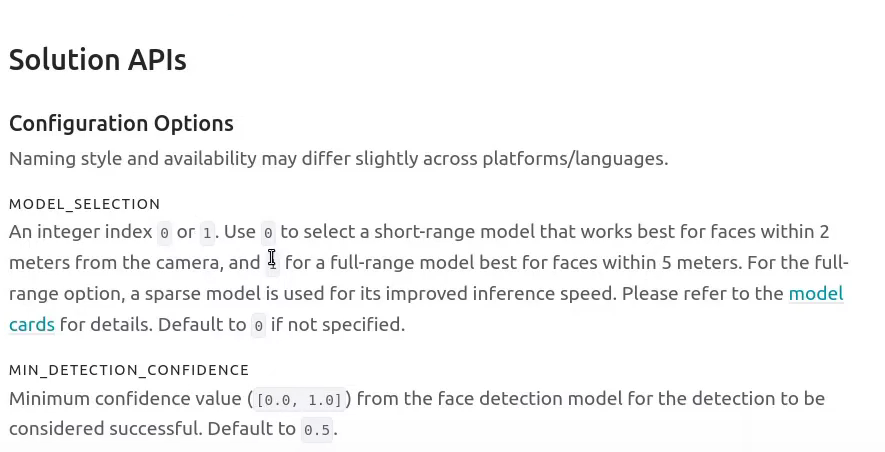